In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [7]:
train_images.shape
type(train_images)

numpy.ndarray

In [4]:
train_images[0,23,23] # Single pixel
print(train_labels[:10]) #Categories class names

[9 0 0 3 0 2 7 2 5 5]


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

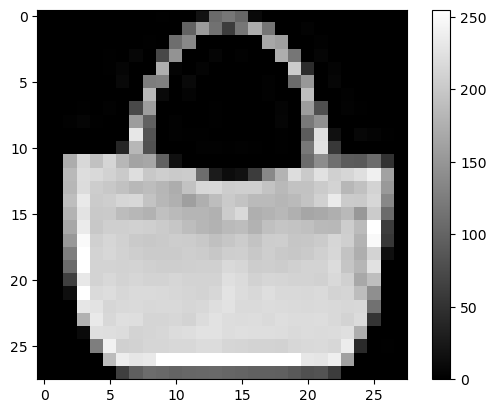

In [24]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()


In [38]:
train_images = train_images/ 255.0
test_images = test_images / 255.0 #Value from 0 - 1

In [39]:
#Architecture of neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer(1)
    keras.layers.Dense(128, activation='relu'), # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [40]:
#Choose optimizer, loss, metric
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [41]:
#Train Model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4958 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3733 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3356 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3125 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2945 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2827 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2684 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2483 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.241

In [42]:
#Test model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Accuracy is ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.8833
Accuracy is  0.8833000063896179


313/313 [==============================] - 1s 2ms/step
Pullover


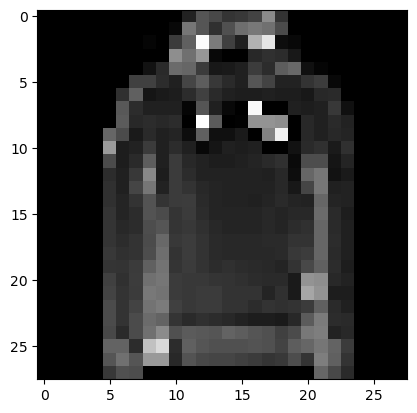

In [49]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[434])])
plt.imshow(test_images[434])